In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [24]:
train_dir = "dataset/train"
valid_dir = "dataset/validation"
test_dir = "dataset/test"
num_classes = 10

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=90,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [26]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 837 images belonging to 10 classes.
Found 99 images belonging to 10 classes.
Found 97 images belonging to 10 classes.


In [27]:
# 架构mobilenet预训练模型，基于imagenet的训练数据，不包括输出层参数

from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# 对base模型参数不可调整
for layer in base_model.layers:
    layer.trainable = False

In [28]:
# 定义我们自己的输出层

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)  #每个feature map取平均，生成特征向量
x = Dense(1024, activation="relu")(x) #1024全连接层
predictions = Dense(num_classes, activation="softmax")(x) #10分类的概率分布

model = Model(inputs=base_model.input, outputs=predictions)

In [29]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [30]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

Epoch 1/50


c:\Users\zhfall\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 [==============================] - 53s 2s/step - loss: 0.9075 - accuracy: 0.7342 - val_loss: 0.1611 - val_accuracy: 0.9479
Epoch 2/50
26/26 [==============================] - 47s 2s/step - loss: 0.2967 - accuracy: 0.9081 - val_loss: 0.1771 - val_accuracy: 0.9375
Epoch 3/50
26/26 [==============================] - 47s 2s/step - loss: 0.1754 - accuracy: 0.9491 - val_loss: 0.1783 - val_accuracy: 0.9375
Epoch 4/50
26/26 [==============================] - 45s 2s/step - loss: 0.1269 - accuracy: 0.9615 - val_loss: 0.0862 - val_accuracy: 0.9792
Epoch 5/50
26/26 [==============================] - 45s 2s/step - loss: 0.1687 - accuracy: 0.9466 - val_loss: 0.1461 - val_accuracy: 0.9583
Epoch 6/50
26/26 [==============================] - 45s 2s/step - loss: 0.0779 - accuracy: 0.9814 - val_loss: 0.1713 - val_accuracy: 0.9688
Epoch 7/50
26/26 [==============================] - 44s 2s/step - loss: 0.0742 - accuracy: 0.9739 - val_loss: 0.1184 - val_accuracy: 0.9792
Epoch 8/50
26/26 [=============

In [32]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.907468,0.734161,0.161143,0.947917
1,0.296695,0.908075,0.177091,0.937500
2,0.175407,0.949068,0.178313,0.937500
3,0.126874,0.961491,0.086212,0.979167
4,0.168692,0.946584,0.146073,0.958333
5,0.077875,0.981366,0.171325,0.968750
6,0.074220,0.973913,0.118422,0.979167
7,0.064804,0.982609,0.080905,0.968750
8,0.072501,0.977640,0.088260,0.979167
9,0.041917,0.986335,0.118747,0.968750


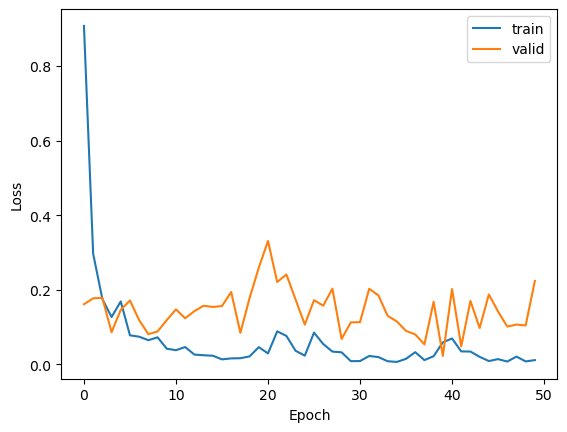

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

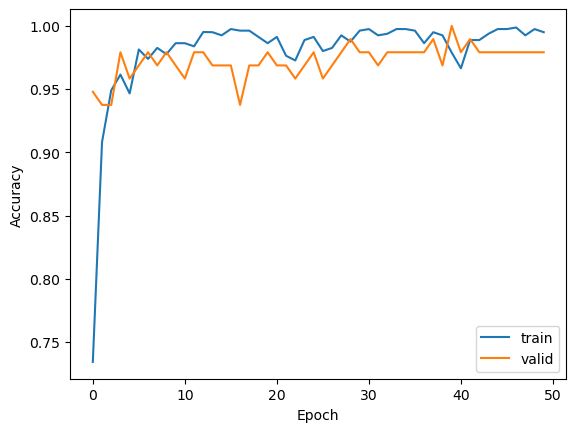

In [34]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

In [35]:
preds = model.predict(test_generator)

4/4 [==============================] - 6s 1s/step


In [36]:
y_pred = np.argmax(preds, axis=1)

In [37]:
for k, v in test_generator.class_indices.items():
    print(v, ":", k)

0 : apple
1 : banana
2 : grapes
3 : kiwi
4 : mango
5 : orange
6 : pear
7 : pineapple
8 : pomegranate
9 : watermelon


In [38]:
pred_classes = {
    0 : "apple",
    1 : "banana",
    2 : "grapes",
    3 : "kiwi",
    4 : "mango",
    5 : "orange",
    6 : "pear",
    7 : "pineapple",
    8 : "pomegranate",
    9 : "watermelon"
}

In [39]:
y_pred = list(map(lambda x: pred_classes[x], y_pred))

In [40]:
y_test = list(map(lambda x: pred_classes[x], test_generator.classes))

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       apple       1.00      0.83      0.91        12
      banana       0.78      1.00      0.88         7
      grapes       1.00      1.00      1.00        10
        kiwi       1.00      1.00      1.00        10
       mango       1.00      1.00      1.00        10
      orange       1.00      1.00      1.00        10
        pear       1.00      1.00      1.00        10
   pineapple       1.00      1.00      1.00        10
 pomegranate       1.00      1.00      1.00        10
  watermelon       1.00      1.00      1.00        10

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



In [42]:
model.save("mv3.h5")